In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math 

In [2]:
#ABRO FICHEROS Y LOS LEO CON PANDAS
infile = "../medidas_flux.txt"
infile_dos = "../lineas.raw"

df_medido = pd.read_csv(infile, sep=' ')
df_raw = pd.read_csv(infile_dos, sep=' ')

In [3]:
#ORDENO TABLAS
df_medido = df_medido.sort_values(by='#center', ascending=True, na_position='last')
df_medido = df_medido.reset_index(drop = True) #RESETEAMOS INDICES

df_raw = df_raw.sort_values(by='lambda', ascending=True, na_position='last')
df_raw = df_raw.reset_index(drop = True) #RESETEAMOS INDICES

In [4]:
#SACO EL REDSHIFT PARA H_ALPHA Y VER QUE LINEAS MEDIDAS REALMENTE LO SON
c = 3*10**5 #kms

h_alpha_medido = df_medido["#center"][22]
h_alpha_teor = df_raw["lambda"][17]
rela_h_alpha = h_alpha_medido/h_alpha_teor

velo = (rela_h_alpha - 1)*c
z = 1 + (velo/c) #ESTO NO ES EL REDSHIFT ES 1+ REDSHIFT

In [5]:
#CORRIJO LAS OBSERVADAS PARA COMPARAR CON LAS TEORICAS
df_correct = df_medido
df_correct["#center"] = df_correct["#center"]/z 

In [6]:
df_correct = df_correct.drop([1,2,5,6,7,9,10,11,12,17,18,20], axis=0) #ELIMINO LAS QUE NO COINCIDEN
df_correct = df_correct.reset_index(drop = True) #RESETEAMOS INDICES

In [7]:
#CREO UN VECTOR CON LAS LINEAS QUE ESTÁN Y LO INCLUYO EN LA TABLA
lines = ["[OII]","[NeIII]","H8","H-delta","H-gamma","H-beta","[OIII]","[OIII]","HeI","[NII]","H-alpha","[NII]","[SII]","[SII]"]
df_correct['lines'] = lines 

In [8]:
#CAMBIO EL ORDEN EN LA TABLA
df_correct = df_correct[["lines","#center", "e_center","cont", "e_cont","flux","e_flux","eqw", "e_eqw","core", "e_core","gfwhm","e_gfwhm","lfwhm", "e_lfwhm"]]
df_correct.columns=["lines","line_obs", "e_obs","cont", "e_cont","flux","e_flux","eqw", "e_eqw","core", "e_core","gfwhm","e_gfwhm","lfwhm", "e_lfwhm"]

#QUITO COLUMNAS QUE NO INTERESAN
df_correct = df_correct.drop(columns={"cont","e_cont","eqw","e_eqw","core","e_core","gfwhm","e_gfwhm","lfwhm","e_lfwhm"})

In [9]:
#QUITO LINEAS QUE NO ESTAN EN LAS OBSERVADAS COMPARANDO df_correct y df_raw
df_raw = df_raw.drop([1,2,3,4,7,8,11,19,22,23,24], axis=0)
df_raw = df_raw.reset_index(drop = True) #RESETEAMOS INDICES

Pendiente = 0.0018647283921760704 +/- 7.896055615676298e-05
Ordenada en origen =  -0.4032393463620566 +/- 0.4258300003679866


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


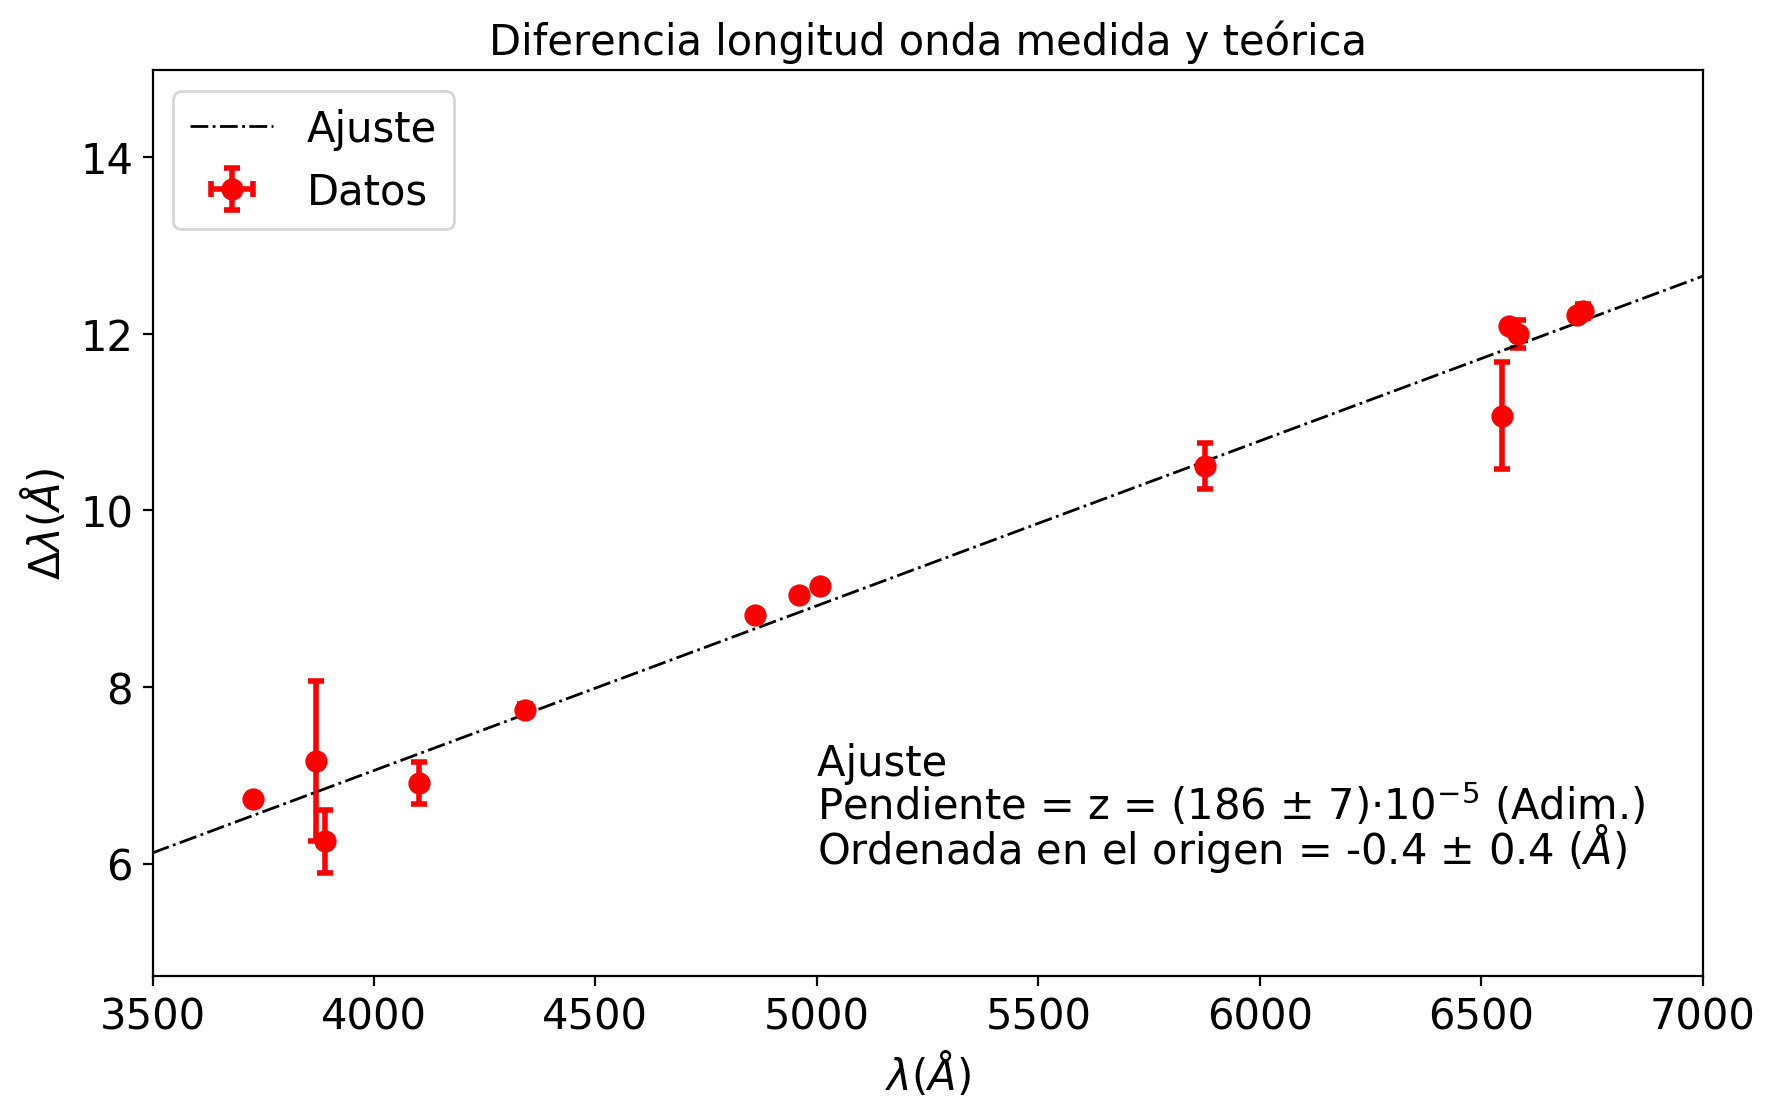

In [10]:
#CALCULO EL REDSHIFT USANDO LA DIF ENTRE LINEAS TEORICAS Y MEDIDAS CON UN AJUSTE
dif_long_onda = np.abs(df_correct["line_obs"]*z - df_raw["lambda"])
e_dif_long_onda = df_correct["e_obs"]

fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)



ax.errorbar(df_raw["lambda"], dif_long_onda, 
            xerr = df_correct['e_obs'], 
            yerr = e_dif_long_onda,
            fmt = "o",
            capsize=3, 
            elinewidth=2,
            markeredgewidth=2, 
            color='r',
            label="Datos")

p, V = np.polyfit(df_raw["lambda"],dif_long_onda,1, cov=True)
print ("Pendiente = {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print ("Ordenada en origen =  {} +/- {}".format(p[1], np.sqrt(V[1][1])))

m = p[0]
b = p[1]
e_m = V[0][0]
e_b = V[1][1]
x = np.arange(3000, 8000,1)
ax.plot(x, m*x + b, color = "black", linewidth=1.0, linestyle="-.",label="Ajuste")

ax.set_xlim(3500, 7000)
ax.tick_params(labelsize=15)

ax.set_title('Diferencia longitud onda medida y teórica', fontsize = 15)
ax.set_xlabel('$\lambda (\AA)$', fontsize = 15)
ax.set_ylabel('$\Delta \lambda(\AA)$', fontsize = 15)

plt.text(5000, 7,'Ajuste ',fontsize = 15)
plt.text(5000, 6.5,'Pendiente = z = (186 $\pm$ 7)$\cdot$10$^{-5}$ (Adim.) ',fontsize = 15)
plt.text(5000, 6,'Ordenada en el origen = {} $\pm$ {} $(\AA)$'.format(round(p[1],2), round(np.sqrt(V[1][1]),1)),fontsize = 15)

ax.legend(loc='upper left',fontsize = 15 )
plt.savefig("borrar.eps")
plt.show()

In [11]:
#CALCULO REDSHIFT, SU ERROR Y LOS METO EN LA TABLA
df_correct["line_obs"] = df_correct["line_obs"]*z #QUITO LA CORRECCION PARA CALCULAR EL REDSHIFT ASOCIADO A CADA LINEA
z = df_correct["line_obs"]/df_raw["lambda"] - 1
e_z = 1/df_raw["lambda"] * df_correct["e_obs"]
df_correct['z'] = z
df_correct['e_z'] = e_z

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


z = 0.0017840914973801406 $\pm$ 7.130559220772067e-05


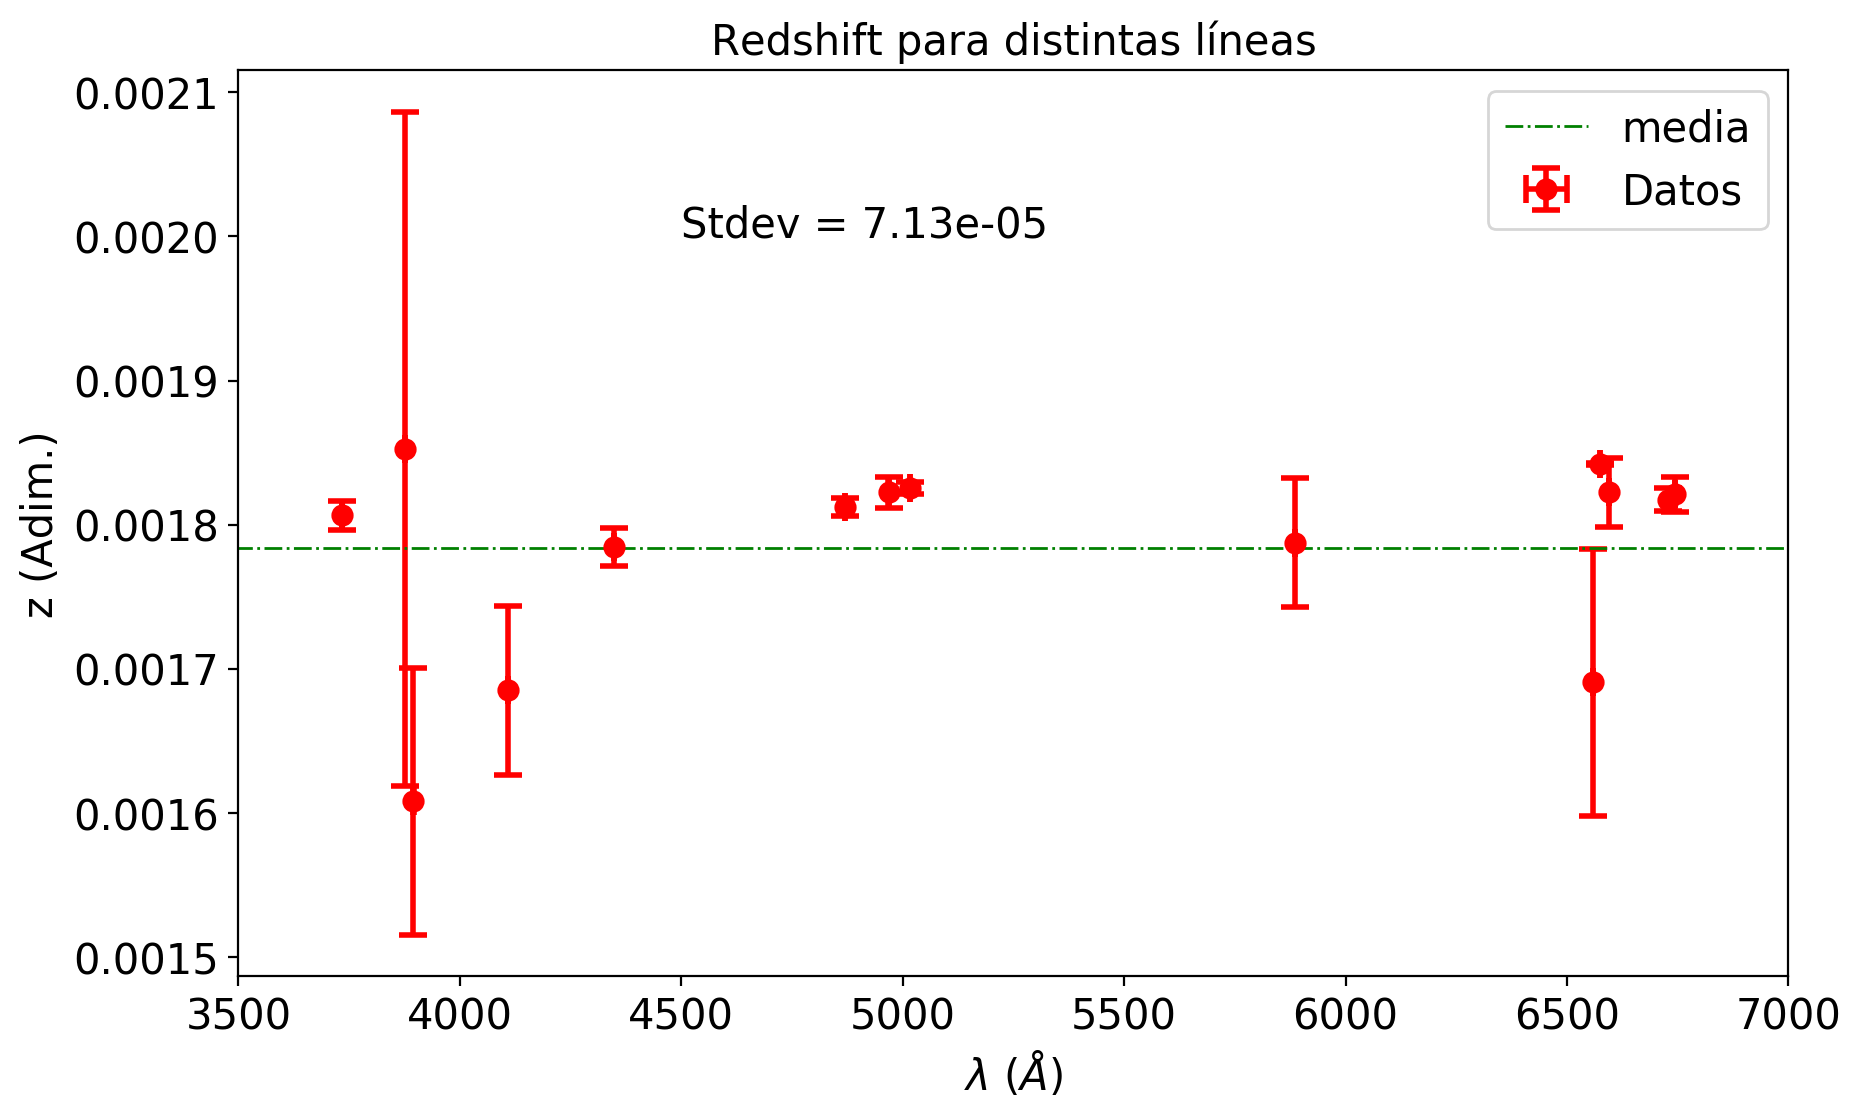

In [12]:
#PLOT CON LOS REDSHIFT PARA DISTINTAS LONG. DE ONDA

fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

plt.xlim(3000,7000)

x = np.arange(2000,9000,1000)
y = [df_correct['z'].mean(), df_correct['z'].mean(),df_correct['z'].mean(), df_correct['z'].mean(), df_correct['z'].mean(), df_correct['z'].mean(), df_correct['z'].mean()]
y_stdev = [df_correct['z'].std(), df_correct['z'].std(),df_correct['z'].std(), df_correct['z'].std(), df_correct['z'].std(), df_correct['z'].std(), df_correct['z'].std()]

print("z = {} $\pm$ {}".format(df_correct['z'].mean(),df_correct['z'].std()))

algo = df_correct['z'].mean()
ax.errorbar(df_correct['line_obs'], df_correct['z'],
            xerr = df_correct['e_obs'],
            yerr = df_correct['e_z'], 
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            color='r',
            label="Datos")

ax.plot(x, y, color = "green", linewidth=1, linestyle="-.",label="media")
#ax.plot(x, y_stdev, color = "blue", linewidth=1, linestyle=":",label="stdev")

ax.set_xlim(3500, 7000)
ax.tick_params(labelsize=15)

ax.set_title('Redshift para distintas líneas', fontsize = 15)
ax.set_xlabel('$\lambda$ ($\AA$)', fontsize = 15)
ax.set_ylabel('z (Adim.)', fontsize = 15)

ax.text(4500, 0.002, "Stdev = {:.3g}".format(df_correct['z'].std()), fontsize=15)
ax.legend(loc='upper right',fontsize = 15)
plt.savefig("r_py.eps")
plt.show()

In [13]:
#FUNCION QUE HACE FALTA PARA EL COEFICIENTE DE EXTINCION Howarth (1984)
def function(long_onda):
    r_v = 3.1
    x = 1.0/long_onda #LONGITUD DE ONDA EN ¡¡¡¡nm!!!!
    
    if x >= 1.83:
        f = r_v + 2.56*(x - 1.83) - 0.993*(x-1.83)**2
        #print("0")
    else:
        f = ((1.86 - 0.48*x)*x - 0.1)*x
        #print("1")
    return(f)

In [14]:
#CALCULAMOS COEF. EXTINCION
#SUPONEMOS REGION HII T=10,000K N_e = 100

rela_h_alpha_beta_teor = 2.86 #SACADO DE UNA TABLA BAJO LAS CONDICIONES DE ARRIBA OSTERBROCK 1989
r_v = 3.1

alpha = 0.6562 #LONG. ONDA H_ALPHA EN MICRAS
beta = 0.4861  #LONG. ONDA H_BETA EN MICRAS

x_alpha = 1.0/alpha #x para h_alpha
x_beta = 1.0/beta #x PARA h_beta

f_h_beta = function(beta) #r_v + 2.56*(x_beta - 1.83) - 0.993*(x_beta - 1.83)**2
f_h_alpha = function(alpha) #((1.86 - 0.48*x_alpha)*x_alpha - 0.1)*x_alpha

rela_f_alpha_beta = f_h_alpha/f_h_beta - 1

rela_h_alpha_beta_obs = df_correct['flux'][10]/df_correct['flux'][5]
#rela_h_alpha_beta_obs = 561.7 / 177.9

coef_extin = rela_h_alpha_beta_obs/rela_h_alpha_beta_teor
coef_extin = - np.log10(coef_extin)/(rela_f_alpha_beta) 
#coef_extin = np.log10(rela_h_alpha_beta_obs / rela_h_alpha_beta_teor) /rela_f_alpha_beta

#ERROR ASOCIADO AL COEFICIENTE CALCULODO -> PROPAGACION
e_coef_extin = (1.0/(rela_f_alpha_beta*df_correct['flux'][10]*df_correct['e_flux'][10]))**2.0
e_coef_extin = e_coef_extin + (1/(rela_f_alpha_beta*df_correct['flux'][5]*df_correct['e_flux'][5]))**2.0
e_coef_extin = np.sqrt(e_coef_extin)

print("Coeficiente extincion = {}+/-{}".format(coef_extin,e_coef_extin))

Coeficiente extincion = 0.14137232512977455+/-0.006085456569518244


In [15]:
#CORREGIMOS LAS LÍNEAS
fun_lines = []
fun = []

f_h_beta_obs = df_correct['line_obs'][5] *10**(-4)

for i in df_correct['line_obs']:#CREO UN VECTOR PARA PODER CORREGIR LAS LINEAS, SINO NO ME 
    i = i*10**(-4)              #DEJA HACER LAS OPERACIONES, 
    fun_lines.append((function(i)/function(f_h_beta_obs)) - 1) #f_h_beta
    #fun_lines.append((function(i)/f_h_beta) - 1) 
    fun.append(function(i))
    #fun.append((function(i)/f_h_beta) - 1) 


    
#CORRECCION DE LINEAS   
df_correct['function'] = fun_lines #CONVIERTO ESTO EN COLUMNA, SINO NO ME DEJA OPERAR
df_correct['funcion'] = fun

flux_correct_normalizado = df_correct['flux']/df_correct['flux'][5]
flux_correct_normalizado = flux_correct_normalizado*10**(coef_extin*(df_correct['function']))
                 
df_correct = df_correct.drop(columns={"function"}) #QUITO LA COLUMNA QUE HE HECHO ANTES, NO ME INTERESA
df_correct['flux_norma'] = flux_correct_normalizado

#ERROR ASOCIADO AL FLUJO NORMALIZADO -> PROPAGACION
e_flux_norma = (df_correct['e_flux']*df_correct['flux_norma']/df_correct['flux'])**2.0 
e_flux_norma = (df_correct['e_flux'][5]*df_correct['flux_norma']/df_correct['flux'][5])**2.0 + e_flux_norma
e_flux_norma = e_flux_norma + (e_coef_extin*df_correct['funcion']/f_h_beta)**2.0
e_flux_norma = np.sqrt(e_flux_norma)

df_correct['e_flux_norma'] = e_flux_norma  #AÑADO EL ERROR A LA TABLA
df_correct #OJO TENGO EL FLUJO NORMALIZADO AL ¡¡¡F_H_BETA TEORICO!!! POR ESO EL FLUJO
            #DE BETA NORMALIZADO NO ES 1, PORQUE NO ESTA A LA LONG. ONDA TEORICA
df_correct

,lines,line_obs,e_obs,flux,e_flux,z,e_z,funcion,flux_norma,e_flux_norma
0,[OII],3734.153,0.03809,552.3130,10.130,0.001806,1.021886e-05,4.556795,3.387886,0.090372
1,[NeIII],3876.228,0.90527,81.3415,17.510,0.001853,2.339767e-04,4.461253,0.494683,0.107174
2,H8,3895.302,0.36108,34.2818,8.835,0.001608,9.284532e-05,4.447567,0.208230,0.054328
3,H-delta,4108.646,0.24023,38.0301,5.575,0.001685,5.856791e-05,4.283831,0.227624,0.034412
4,H-gamma,4348.209,0.05811,92.9876,3.079,0.001784,1.338797e-05,4.083517,0.546634,0.022024
5,H-beta,4870.136,0.03027,177.3100,3.411,0.001812,6.226697e-06,3.622199,1.000000,0.027875
6,[OIII],4967.949,0.05322,116.6100,3.635,0.001823,1.073220e-05,3.535013,0.652529,0.024626
7,[OIII],5015.982,0.02051,347.5550,3.827,0.001825,4.096394e-06,3.492300,1.937405,0.043342
8,HeI,5886.473,0.26416,22.3975,2.947,0.001787,4.495598e-05,2.844705,0.117793,0.016373
9,[NII],6559.109,0.60498,11.1377,2.524,0.001690,9.239101e-05,2.469909,0.056636,0.013530


In [16]:
intens_ratio = df_correct['flux_norma'][12]/df_correct['flux_norma'][13]
e_intens_ratio = (df_correct['e_flux_norma'][12]/df_correct['flux_norma'][13])**2
e_intens_ratio = e_intens_ratio + (df_correct['e_flux_norma'][13]*df_correct['flux_norma'][12]/df_correct['flux_norma'][13]**2)**2
e_intens_ratio = np.sqrt(e_intens_ratio)
print("Intens_ratio = {} $\pm$ {}".format(intens_ratio,e_intens_ratio))

Intens_ratio = 1.4435786265411223 $\pm$ 0.08548503864047993


In [17]:
#DESNORMALIZO EL FLUJO
#CORREGIMOS LAS LÍNEAS
df_correct = df_correct.drop(columns={"funcion"}) #QUITO ESTA COLUMNA
flux_beta_obs = df_correct['flux'][5]

flux_beta_normaliza = flux_beta_obs*10**(coef_extin)
e_flux_beta_normaliza = np.log(10)*10**(coef_extin)*e_coef_extin
df_correct['flux_nonorma'] = round(df_correct['flux_norma'] *flux_beta_normaliza)

e_flux_nornorma = (flux_beta_normaliza*df_correct['e_flux_norma'])**2
e_flux_nornorma = e_flux_nornorma + (e_flux_beta_normaliza*df_correct['flux_norma'])**2
e_flux_nornorma = np.sqrt(e_flux_nornorma)
df_correct['e_flux_nonorma'] = round(e_flux_nornorma)

df_correct

,lines,line_obs,e_obs,flux,e_flux,z,e_z,flux_norma,e_flux_norma,flux_nonorma,e_flux_nonorma
0,[OII],3734.153,0.03809,552.3130,10.130,0.001806,1.021886e-05,3.387886,0.090372,832.0,22.0
1,[NeIII],3876.228,0.90527,81.3415,17.510,0.001853,2.339767e-04,0.494683,0.107174,121.0,26.0
2,H8,3895.302,0.36108,34.2818,8.835,0.001608,9.284532e-05,0.208230,0.054328,51.0,13.0
3,H-delta,4108.646,0.24023,38.0301,5.575,0.001685,5.856791e-05,0.227624,0.034412,56.0,8.0
4,H-gamma,4348.209,0.05811,92.9876,3.079,0.001784,1.338797e-05,0.546634,0.022024,134.0,5.0
5,H-beta,4870.136,0.03027,177.3100,3.411,0.001812,6.226697e-06,1.000000,0.027875,246.0,7.0
6,[OIII],4967.949,0.05322,116.6100,3.635,0.001823,1.073220e-05,0.652529,0.024626,160.0,6.0
7,[OIII],5015.982,0.02051,347.5550,3.827,0.001825,4.096394e-06,1.937405,0.043342,476.0,11.0
8,HeI,5886.473,0.26416,22.3975,2.947,0.001787,4.495598e-05,0.117793,0.016373,29.0,4.0
9,[NII],6559.109,0.60498,11.1377,2.524,0.001690,9.239101e-05,0.056636,0.013530,14.0,3.0


In [18]:
(22/831)*100

2.6474127557160045

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


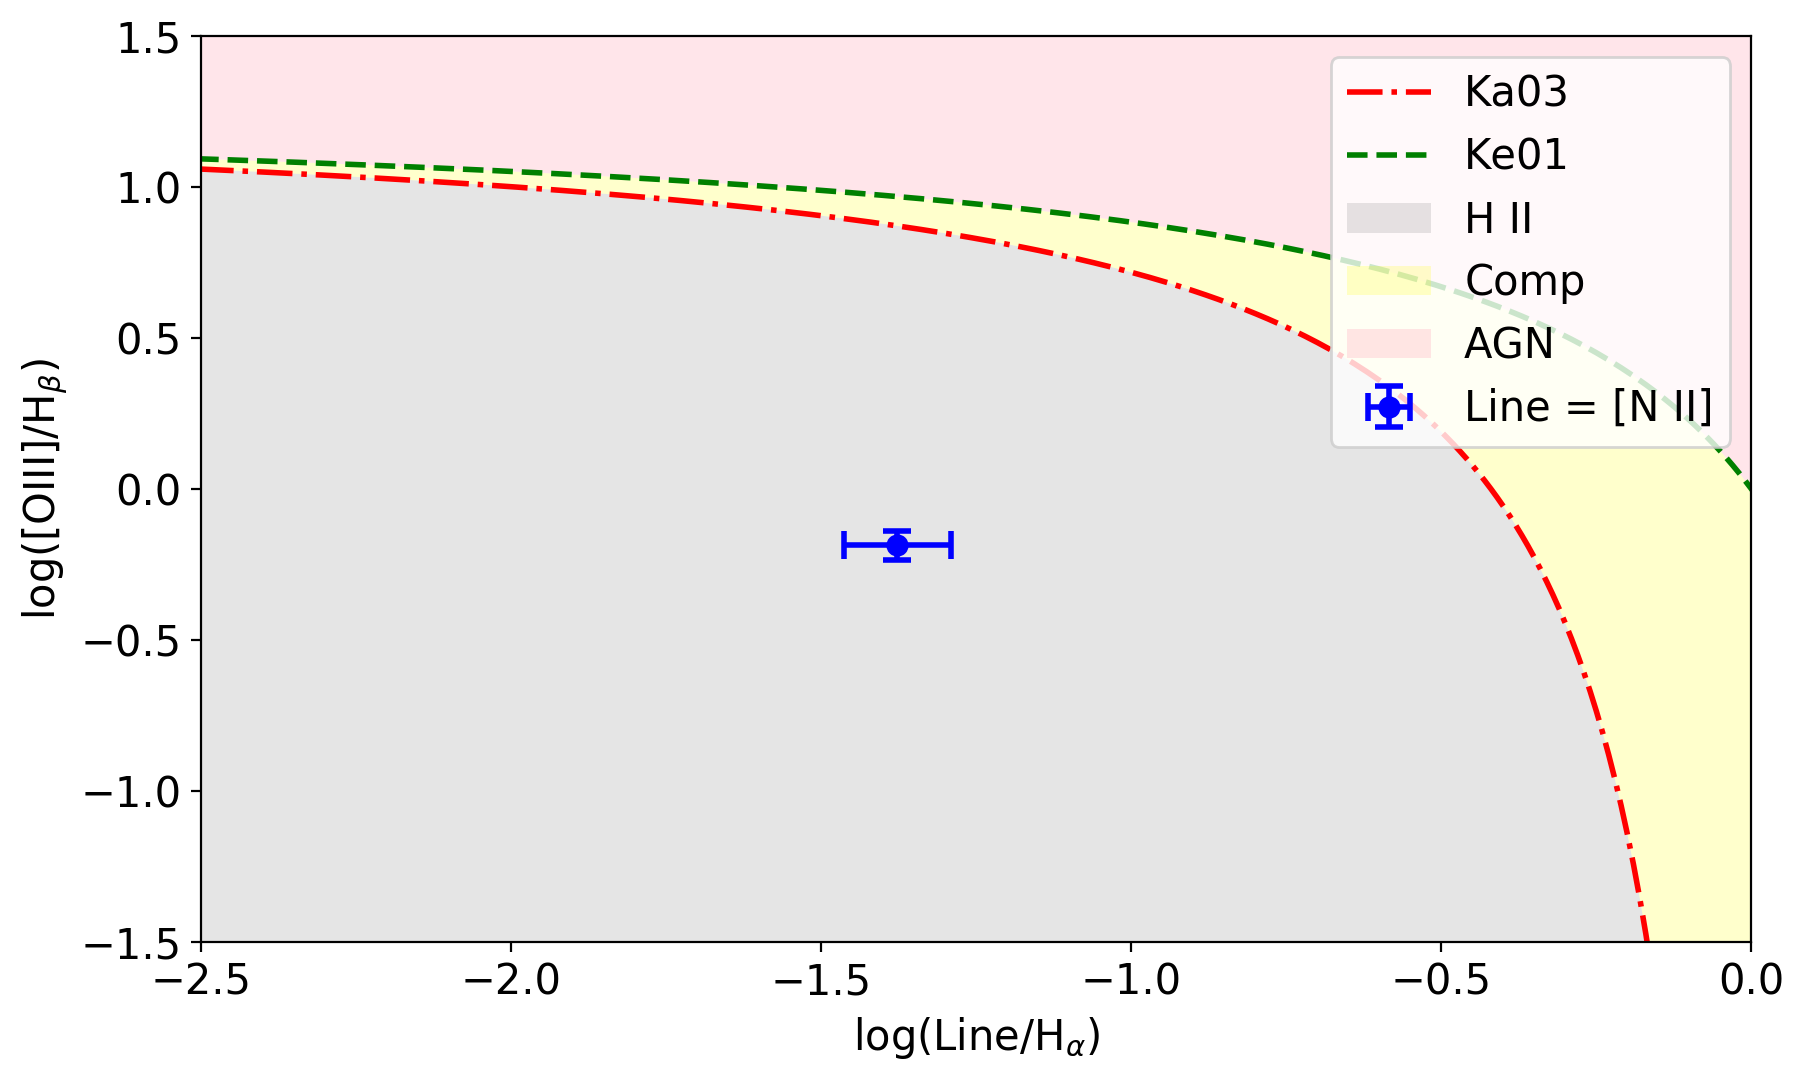

In [19]:
#DIAGRAMAS MECANISMOS IONIZACION
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

#ax.plot(tablas_z[6]["flux_norma"], tablas_z[5]["flux_norma"], linewidth=0.5, linestyle=".", label = "Z = {}".format(round(z_mean, 2)))
#ax.plot(np.log10(df_correct["flux_norma"][11]/df_correct["flux_norma"][10]),np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]), "o", label = "Line = [N II]")
#ax.plot(np.log10(df_correct["flux_norma"][12]/df_correct["flux_norma"][10]),np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]), "o", label = "Line = [S II]")

ax.errorbar(np.log10(df_correct["flux_norma"][11]/df_correct["flux_norma"][10]), 
            np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]),
            xerr = np.sqrt((df_correct["e_flux_norma"][11]/df_correct["flux_norma"][11])**2 +(df_correct["e_flux_norma"][10]/df_correct["flux_norma"][10])**2) ,
            yerr = np.sqrt((df_correct["e_flux_norma"][6]/df_correct["flux_norma"][6])**2 +(df_correct["e_flux_norma"][5]/df_correct["flux_norma"][5])**2), 
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            color='blue',
            label="Line = [N II]")

x = []
y = []
min = -2.6
max = 1
for i in np.arange(min,max,0.01):
    x.append(i)
    y.append(0.61/(i - 0.05) + 1.3)
ax.plot(x,y, linewidth = 2,color = "red", linestyle="-.", label = "Ka03")


y_dos = []
for i in np.arange(min,max,0.01):
    y_dos.append(0.61/(i - 0.47) + 1.30)
ax.plot(x,y_dos, linewidth = 2,color = "green", linestyle="--", label = "Ke01")

#RELLENO CUADRADITOS
ax.fill_between(x,-2,y,facecolor = "gray", alpha = 0.2, label = "H II")
ax.fill_between(x,y,y_dos,facecolor = "yellow", alpha = 0.2, label = "Comp")
ax.fill_between(x,y_dos,2,facecolor = "pink", alpha = 0.4, label = "AGN")


ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-2.5, 0)
ax.tick_params(labelsize=15)

ax.set_title('')
ax.set_xlabel('log(Line/H$_\\alpha$)',fontsize = 15)
ax.set_ylabel('log([OIII]/H$_\\beta$)',fontsize = 15)
#ax.text(-1.1,0.25,"H II")

ax.legend(loc='upper right',fontsize = 15)
plt.savefig("diag.eps")
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


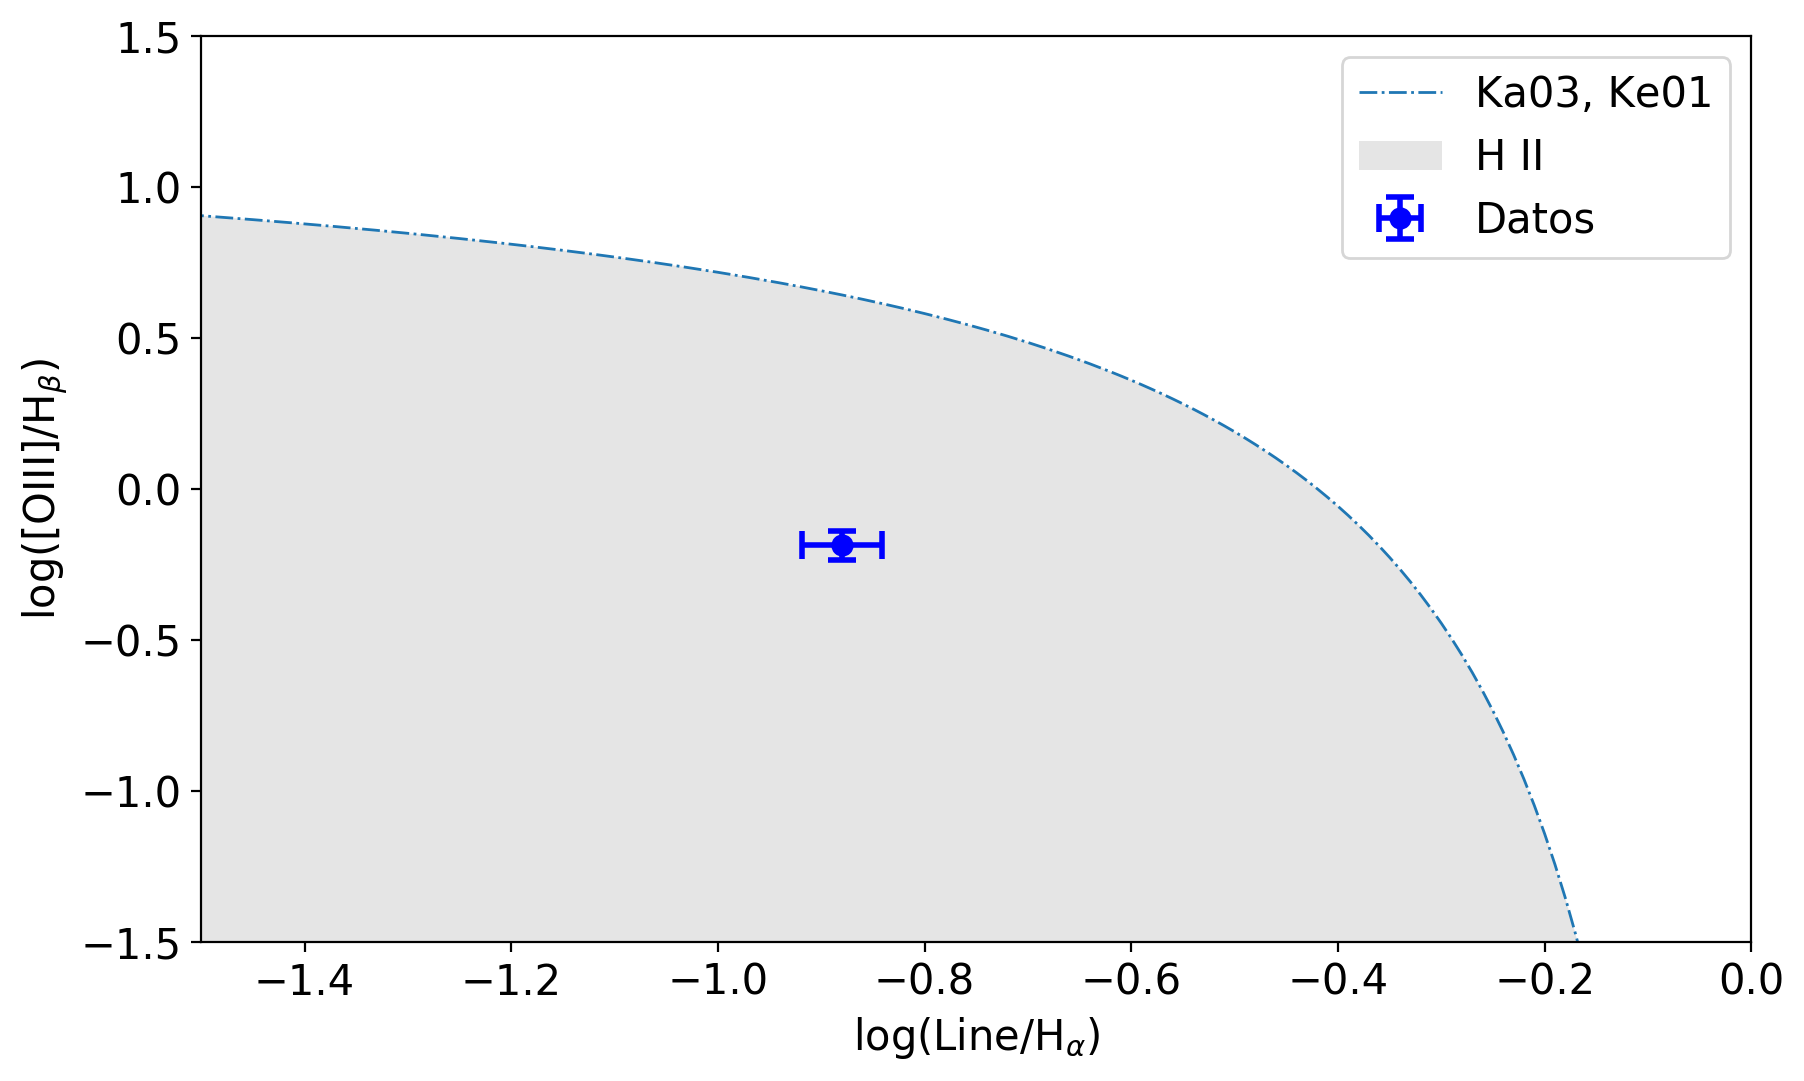

In [50]:
#DIAGRAMAS MECANISMOS IONIZACION
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

#ax.plot(tablas_z[6]["flux_norma"], tablas_z[5]["flux_norma"], linewidth=0.5, linestyle=".", label = "Z = {}".format(round(z_mean, 2)))
#ax.plot(np.log10(df_correct["flux_norma"][11]/df_correct["flux_norma"][10]),np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]), "o", label = "Line = [N II]")
#ax.plot(np.log10(df_correct["flux_norma"][12]/df_correct["flux_norma"][10]),np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]), "o", label = "Line = [S II]")
ax.errorbar(np.log10(df_correct["flux_norma"][12]/df_correct["flux_norma"][10]), 
            np.log10(df_correct["flux_norma"][6]/df_correct["flux_norma"][5]),
            xerr = np.sqrt((df_correct["e_flux_norma"][12]/df_correct["flux_norma"][12])**2 +(df_correct["e_flux_norma"][10]/df_correct["flux_norma"][10])**2) ,
            yerr = np.sqrt((df_correct["e_flux_norma"][6]/df_correct["flux_norma"][6])**2 +(df_correct["e_flux_norma"][5]/df_correct["flux_norma"][5])**2), 
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            color='blue',
            label="Datos")


x = []
y = []
min = -1.6
max = 1
for i in np.arange(min,max,0.01):
    x.append(i)
    y.append(0.61/(i - 0.05) + 1.3)
ax.plot(x,y, linewidth = 1, linestyle="-.", label = "Ka03, Ke01")


#y_dos = []
#for i in np.arange(min,max,0.01):
 #   y_dos.append(0.72/(i - 0.32) + 1.30)
#ax.plot(x,y_dos, linewidth = 1, linestyle=":", label = "Ke01")

#RELLENO CUADRADITOS
ax.fill_between(x,-2,y,facecolor = "gray", alpha = 0.2, label = "H II")
#ax.fill_between(x,y,y_dos,facecolor = "orange", alpha = 0.2, label = "Comp")
#ax.fill_between(x,y_dos,2,facecolor = "purple", alpha = 0.4, label = "AGN")


ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 0)
ax.tick_params(labelsize=15)

ax.set_title('')
ax.set_xlabel('log(Line/H$_\\alpha$)',fontsize=15)
ax.set_ylabel('log([OIII]/H$_\\beta$)',fontsize=15)
#ax.text(-1.1,0.25,"H II")

ax.legend(loc='upper right',fontsize = 15)
plt.savefig("diag_dos.eps")
plt.show()

In [21]:
#DENSIDAD ELECTRONICA
N_e = df_correct["flux_norma"][12]/df_correct["flux_norma"][13]
e_N_e = (df_correct["e_flux_norma"][12]/df_correct["flux_norma"][13])**2.0
e_N_e = e_N_e + (df_correct["e_flux_norma"][13]*df_correct["flux_norma"][12]/df_correct["flux_norma"][13]**2.0)**2.0
e_N_e = np.sqrt(e_N_e)
print("N_e = {}$\\pm${}".format(N_e,e_N_e))

N_e = 1.4435786265411223$\pm$0.08548503864047993


In [22]:
#ESTIMACION ABUNDANCIA OXIGENO 
R_dos_tres = (df_correct["flux_norma"][0] + df_correct["flux_norma"][6] + df_correct["flux_norma"][7])/ df_correct["flux_norma"][5]
e_R_dos_tres = (df_correct["e_flux_norma"][0]/ df_correct["flux_norma"][5])**2
e_R_dos_tres = e_R_dos_tres + (df_correct["e_flux_norma"][6]/ df_correct["flux_norma"][5])**2
e_R_dos_tres = e_R_dos_tres + (df_correct["e_flux_norma"][7]/ df_correct["flux_norma"][5])**2
e_R_dos_tres = e_R_dos_tres + (df_correct["e_flux_norma"][5]*(df_correct["flux_norma"][0] + df_correct["flux_norma"][6] + df_correct["flux_norma"][7])/ df_correct["flux_norma"][5]**2)**2
e_R_dos_tres = np.sqrt(e_R_dos_tres)

#param_R_dos_tres =  9.265 - 0.33*R_dos_tres - 0.202*R_dos_tres**2.0 - 0.207*R_dos_tres**3.0 - 0.333*R_dos_tres**4
print("R_dos_tres = {}$\\pm${}".format(R_dos_tres,e_R_dos_tres))

O_tres_dos = (df_correct["flux_norma"][6] + df_correct["flux_norma"][7])/ df_correct["flux_norma"][0]
e_O_tres_dos = (df_correct["e_flux_norma"][6]/ df_correct["flux_norma"][0])**2
e_O_tres_dos = e_O_tres_dos + (df_correct["e_flux_norma"][7]/ df_correct["flux_norma"][0])**2
e_O_tres_dos = e_O_tres_dos + (df_correct["e_flux_norma"][0]*(df_correct["flux_norma"][6] + df_correct["flux_norma"][7])/df_correct["flux_norma"][0]**2)**2
e_O_tres_dos = np.sqrt(e_O_tres_dos)
print("O_tres_dos  = {}$\\pm${}".format(O_tres_dos,e_O_tres_dos))


x = np.log10(R_dos_tres) 
y = np.log10(O_tres_dos)
e_x = e_R_dos_tres/R_dos_tres
e_y = e_O_tres_dos/O_tres_dos

#CALCULO SU COORDENADA EN Y CON LA PARAMETRIZACIÓN ---> METALICIDAD
down = 12 - 4.944 + 0.767*x + 0.602*x**2 - y*(0.29 + 0.332*x - 0.331*x**2)
e_down = e_x*(0.767 + 2*0.602*x - y*(0.332*x - 2*0.331*x))

up = 12 - 2.939 - 0.2*x - 0.237*x**2 - 0.305*x**3 - 0.0283*x**4 - y*(0.0047 - 0.0221*x - 0.102*x**2 - 0.0817*x**3 - 0.00717*x**4)
e_up = np.abs(e_x*(- 0.2 - 2*0.237*x - 3*0.305*x**2 - 4*0.0283*x**3 - y*(- 0.0221 - 2*0.102*x - 3*0.0817*x**2 - 4*0.00717*x**3)))
print("up = {} $\\pm${}".format(up,e_up))
print("down = {} $\\pm${}".format(down,e_down))
print("x = {} $\\pm$ {}".format(x,e_x))
print("y ={} $\\pm$ {}".format(y,e_y))

R_dos_tres = 5.977819760246599$\pm$0.19600674229096038
O_tres_dos  = 0.7644690408286586$\pm$0.025146435436535473
up = 8.596268612544662 $\pm$0.03976363949143672
down = 8.055241224494567 $\pm$0.054825422821477794
x = 0.7765428163054042 $\pm$ 0.03278900170166299
y =-0.1166400977853791 $\pm$ 0.03289398797533721


In [23]:
#CREO UNA FUNCION PARA ESTIMAR EL x_lim QUE VOY A PINTAR LUEGO PARA LA PARAMETRIZACION DE R_23
def limite_intervalo(y):
    x_aux_dos = np.arange(0.8,1.2,0.00001)
    for j in x_aux_dos:
        l = 12 - 4.944 + 0.767*j + 0.602*j**2 - i*(0.29 + 0.332*j - 0.331*j**2)
        u = 12 - 2.939 - 0.2*j - 0.237*j**2 - 0.305*j**3 - 0.0283*j**4 - i*(0.0047 - 0.0221*j - 0.102*j**2 - 0.0817*j**3 - 0.00717*j**4)
        if l > u:
            return (j) #ESTE j ES EL X QUE PARA UN Y DADO HACE QUE LAS FUNCIONES SE CORTEN

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


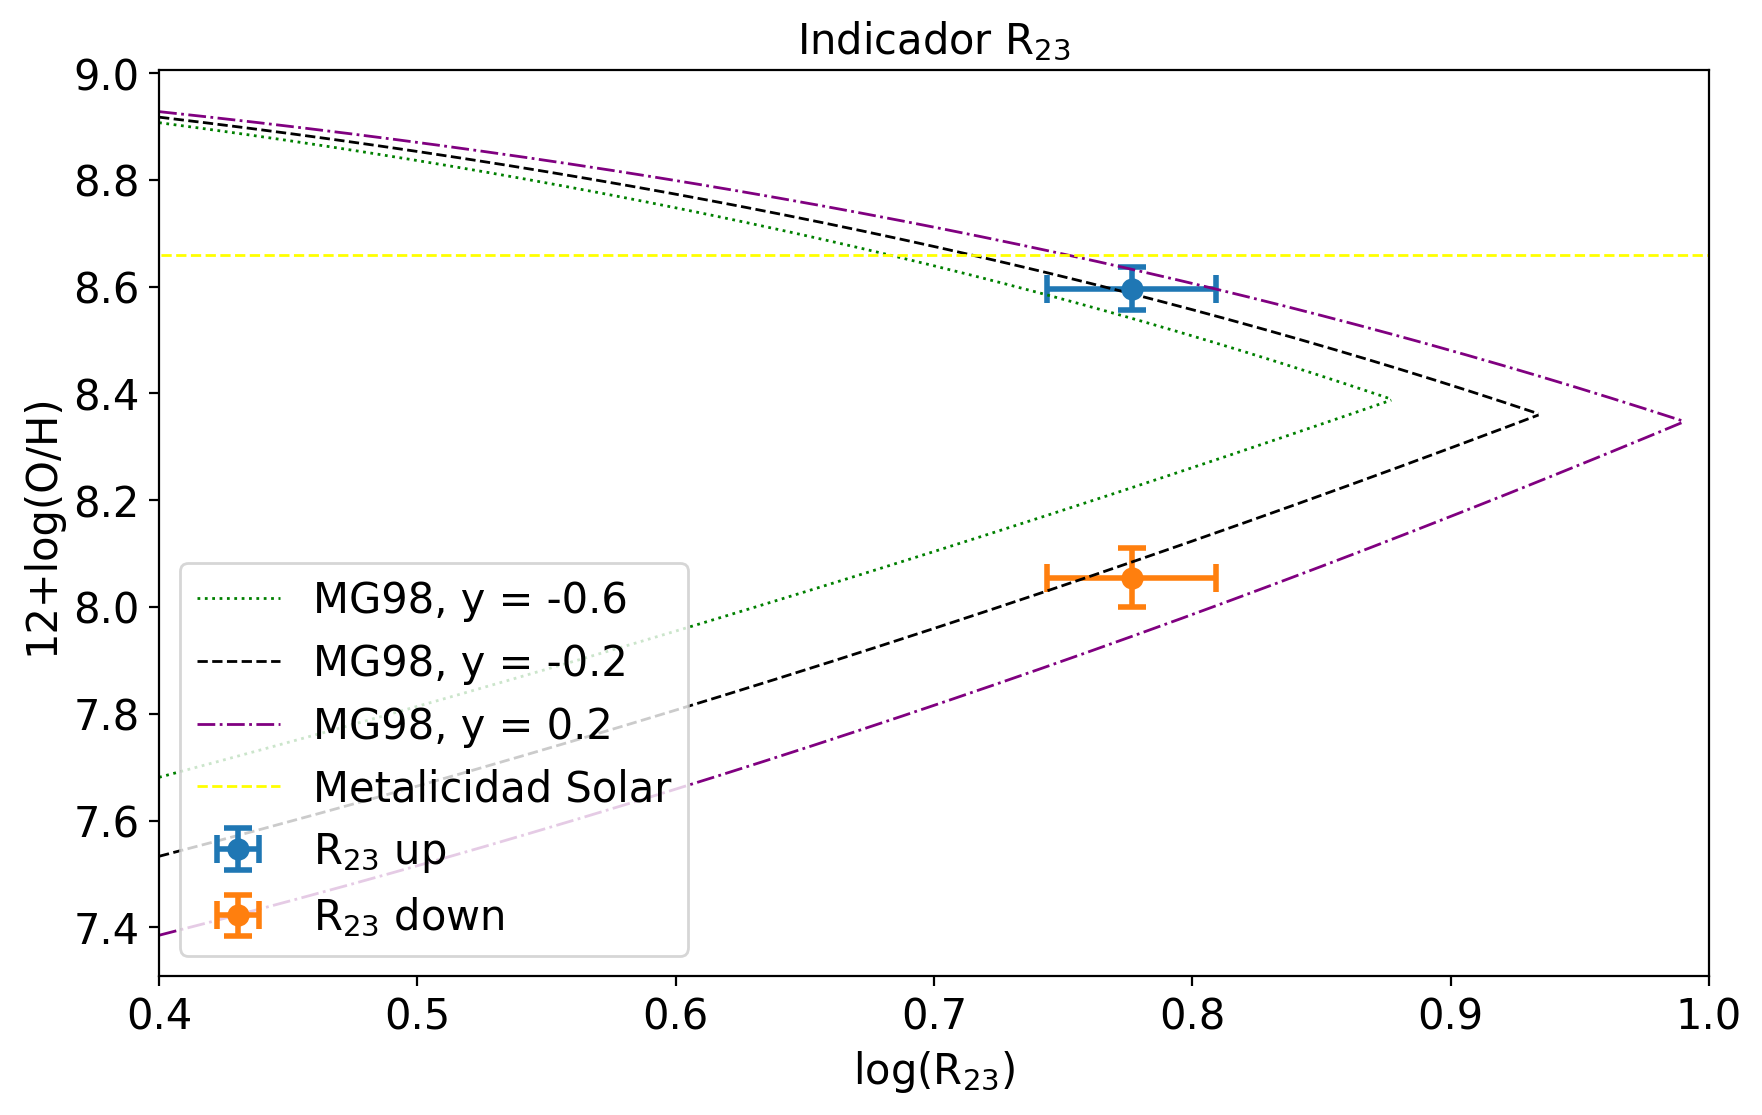

In [51]:
#PLOT PARA EL ESTIMADOR R_23
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.set_title('Indicador R$_{23}$', fontsize = 15)
ax.set_xlabel('log(R$_{23})$', fontsize = 15)
ax.set_ylabel('12+log(O/H)', fontsize = 15)

#PINTO EL COEFICIENTE PARA LAS DOS RAMAS PRIMERO UP Y LUEGO DOWN
ax.errorbar(np.log10(R_dos_tres), up,
            xerr = e_R_dos_tres/R_dos_tres,
            yerr = e_up,
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            label='R$_{23}$ up')

ax.errorbar(np.log10(R_dos_tres), down,
            xerr = e_R_dos_tres/R_dos_tres,
            yerr = e_down,
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            label='R$_{23}$ down')


#DEFINO UNOS VECTORES DE COLORES Y TIPOS DE LINEAS PARA LA REPRESENTACION DE LA PARAMETRIZACION
colors = ["green","black","purple"]
line_type = [":","--","-."]
aux = 0 #PARA CAMBIAR EL COLOR Y EL TIPO DE LINEA
y_aux = np.arange(-0.6,0.4,0.4) #VALORES DE Y QUE VOY A DAR
#i = y_aux
for i in y_aux:
    x_aux = np.arange(0.4,limite_intervalo(i),0.001) #VALORES QUE VA A TOMAR x, HASTA EL x_lim DONDE SE CORTAN LAS FUNCIONES
    down_aux = 12 - 4.944 + 0.767*x_aux + 0.602*x_aux**2 - i*(0.29 + 0.332*x_aux - 0.331*x_aux**2)
    up_aux = 12 - 2.939 - 0.2*x_aux - 0.237*x_aux**2 - 0.305*x_aux**3 - 0.0283*x_aux**4 - i*(0.0047 - 0.0221*x_aux - 0.102*x_aux**2 - 0.0817*x_aux**3 - 0.00717*x_aux**4)
    ax.plot(x_aux,up_aux, color = colors[aux], linewidth=1, linestyle=line_type[aux],label="MG98, y = {}".format(round(i,3)))
    ax.plot(x_aux,down_aux, color = colors[aux], linewidth=1, linestyle=line_type[aux])
    aux = aux + 1

#PINTO LA METALICIDAD DEL SOL    
x_sol = np.arange(-5,2,3)
y_sol = [8.66,8.66,8.66]
ax.plot(x_sol, y_sol, color = "yellow", linewidth=1, linestyle="--",label="Metalicidad Solar")

#LIMITES DEL PLOT
ax.set_xlim(0.4,1)
#ax.set_ylim(-5,10)
ax.tick_params(labelsize=15)


ax.legend(loc='lower left',fontsize = 15)
plt.savefig("r_dos_tres.eps")
plt.show()

In [25]:
#CALCULO EL INDICE N_2
N_dos = np.log10(df_correct["flux_norma"][11]/ df_correct["flux_norma"][10])
e_N_dos = (df_correct["e_flux_norma"][11]/df_correct["flux_norma"][11])**2
e_N_dos = e_N_dos + (df_correct["e_flux_norma"][10]/df_correct["flux_norma"][10])**2
e_N_dos = np.sqrt(e_N_dos)

#CALCULO SU COORDENADA EN Y CON LA PARAMETRIZACIÓN ---> METALICIDAD
param_N_dos =  9.37 + 2.03*N_dos + 1.26* N_dos**2 + 0.32*N_dos**3
e_param_N_dos = (2.03 + 2*1.26*N_dos + 3*0.32*N_dos**2)*e_N_dos

print("N_dos = {}$\\pm${}".format(N_dos,e_N_dos))
print("param_N_dos = {}$\pm${}".format(param_N_dos,e_N_dos))

N_dos = -1.3772941360526585$\pm$0.08651570429875868
param_N_dos = 8.128190408652639$\pm$0.08651570429875868


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


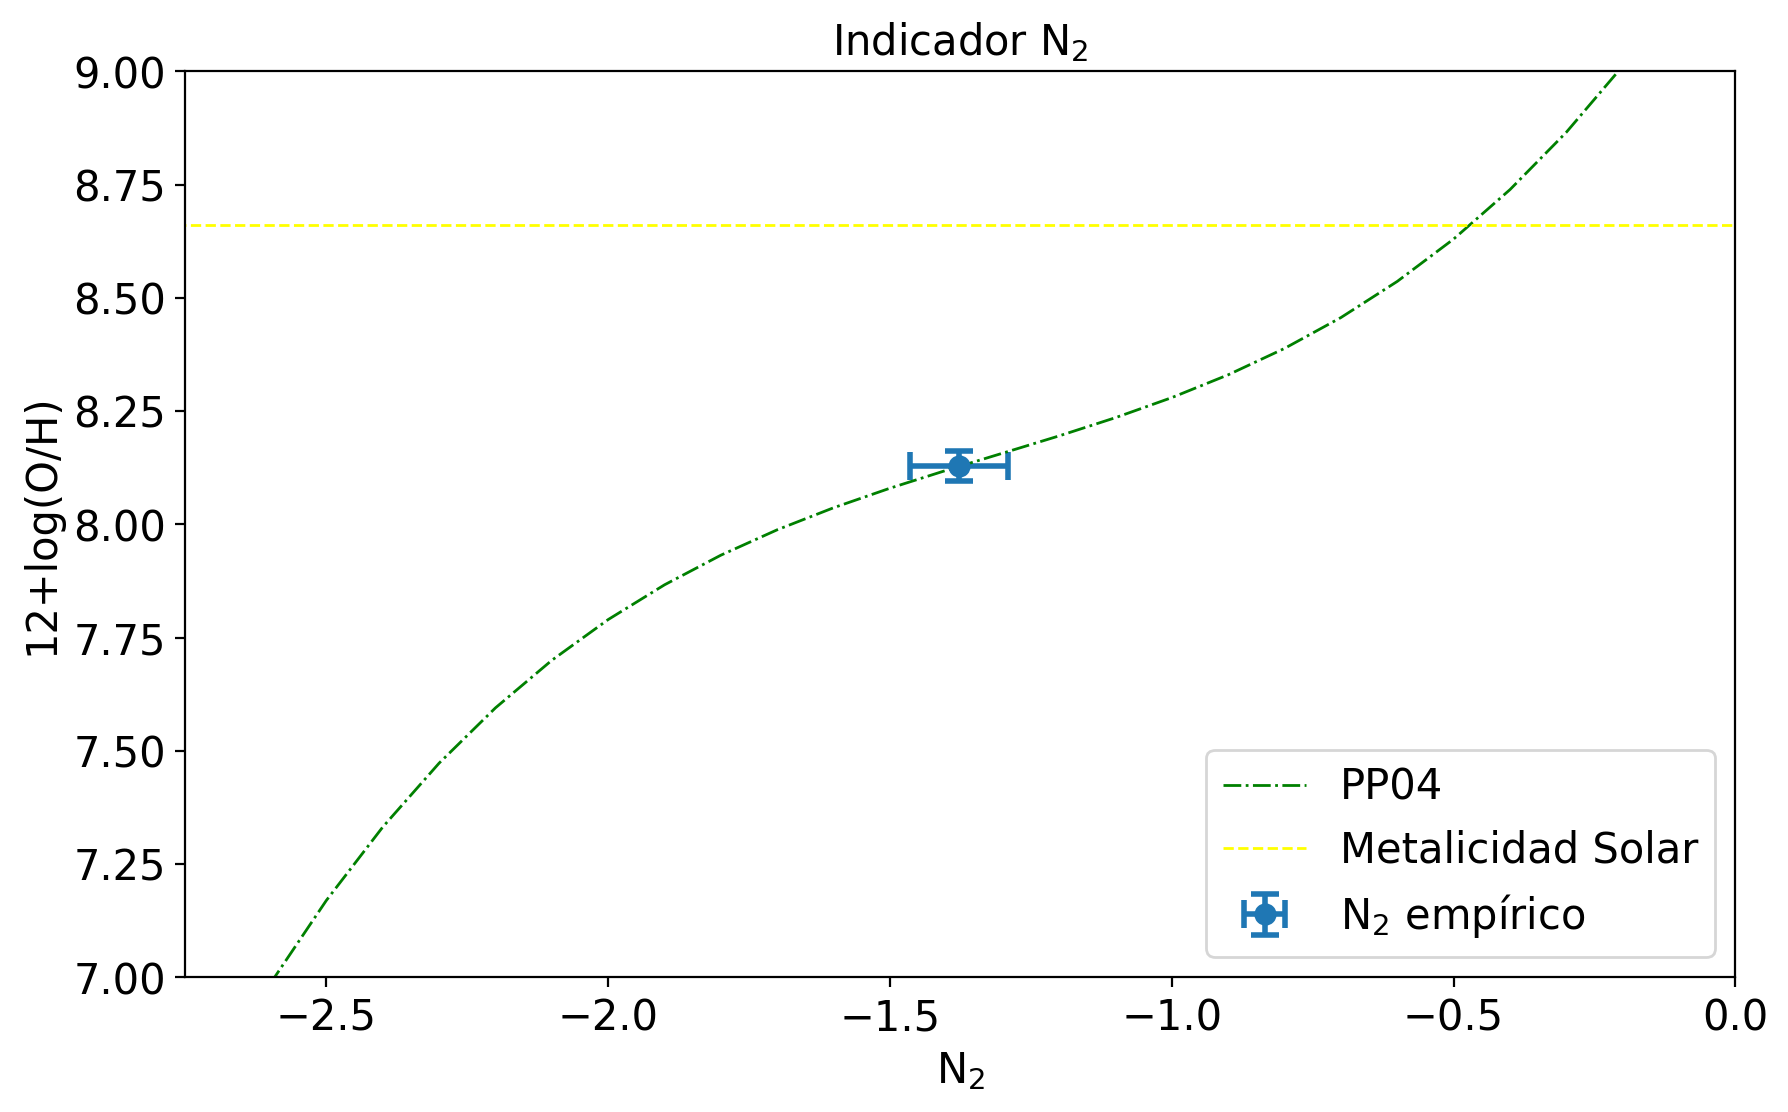

In [26]:
#PLOT PARA EL ESTIMADOR N_2
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

x = np.arange(-5,2,0.1)

param = 9.37 + 2.03*x + 1.26* x**2 + 0.32*x**3

#y_line = 9.37 + 2.03*N_dos + 1.26* N_dos**2 + 0.32*N_dos**3

#ax.errorbar(N_dos, y_line, xerr = e_N_dos,label="r-i")
ax.errorbar(N_dos, param_N_dos,
            xerr = e_N_dos,
            yerr = e_param_N_dos,
            fmt = "o",
            capsize=5, 
            elinewidth=2,
            markeredgewidth=2, 
            label='N$_2$ empírico')

ax.plot(x, param, color = "green", linewidth=1, linestyle="-.",label="PP04")

x_sol = np.arange(-5,2,3)
y_sol = [8.66,8.66,8.66]
ax.plot(x_sol, y_sol, color = "yellow", linewidth=1, linestyle="--",label="Metalicidad Solar")

ax.set_xlim(-2.75,0)
ax.set_ylim(7,9)
#ax.set_ylim(-2,20)
ax.tick_params(labelsize=15)

ax.set_title('Indicador N$_2$',fontsize = 15)
ax.set_xlabel('N$_2$',fontsize = 15)
ax.set_ylabel('12+log(O/H)',fontsize = 15)

#ax.text(4500, 0.002, "Stdev = {:.3g}".format(df_correct['z'].std()), fontsize=12)
ax.legend(loc='lower right',fontsize = 15)
plt.savefig("n_dos.eps")
plt.show()

In [27]:
#INDICE O_32
o_tres_n_dos = df_correct["flux_norma"][12]/df_correct["flux_norma"][5]
o_tres_n_dos = o_tres_n_dos/(df_correct["flux_norma"][11]/df_correct["flux_norma"][10])
o_tres_n_dos = np.log(o_tres_n_dos)

e_o_tres_n_dos = (df_correct["e_flux_norma"][12]/df_correct["flux_norma"][5])**2
e_o_tres_n_dos = e_o_tres_n_dos + (df_correct["e_flux_norma"][5]*df_correct["flux_norma"][12]/df_correct["flux_norma"][5]**2)**2
e_o_tres_n_dos = np.sqrt(e_o_tres_n_dos)
print("o_tres_n_dos = {} +/-{}".format(o_tres_n_dos,e_o_tres_n_dos))

#CALCULO SU COORDENADA EN Y CON LA PARAMETRIZACIÓN ---> METALICIDAD
param_o_tres_n_dos = 8.73 - 0.32 * o_tres_n_dos
e_param_o_tres_n_dos = 0.32 * e_o_tres_n_dos
#print("o_tres_n_dos = {}$\\pm${}".format(o_tres_n_dos,e_o_tres_n_dos))
print("param_o_tres_n_dos = {} +/-{}".format(param_o_tres_n_dos,e_param_o_tres_n_dos))

o_tres_n_dos = 2.1955306073802916 +/-0.016447982321328273
param_o_tres_n_dos = 8.027430205638307 +/-0.0052633543428250475


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


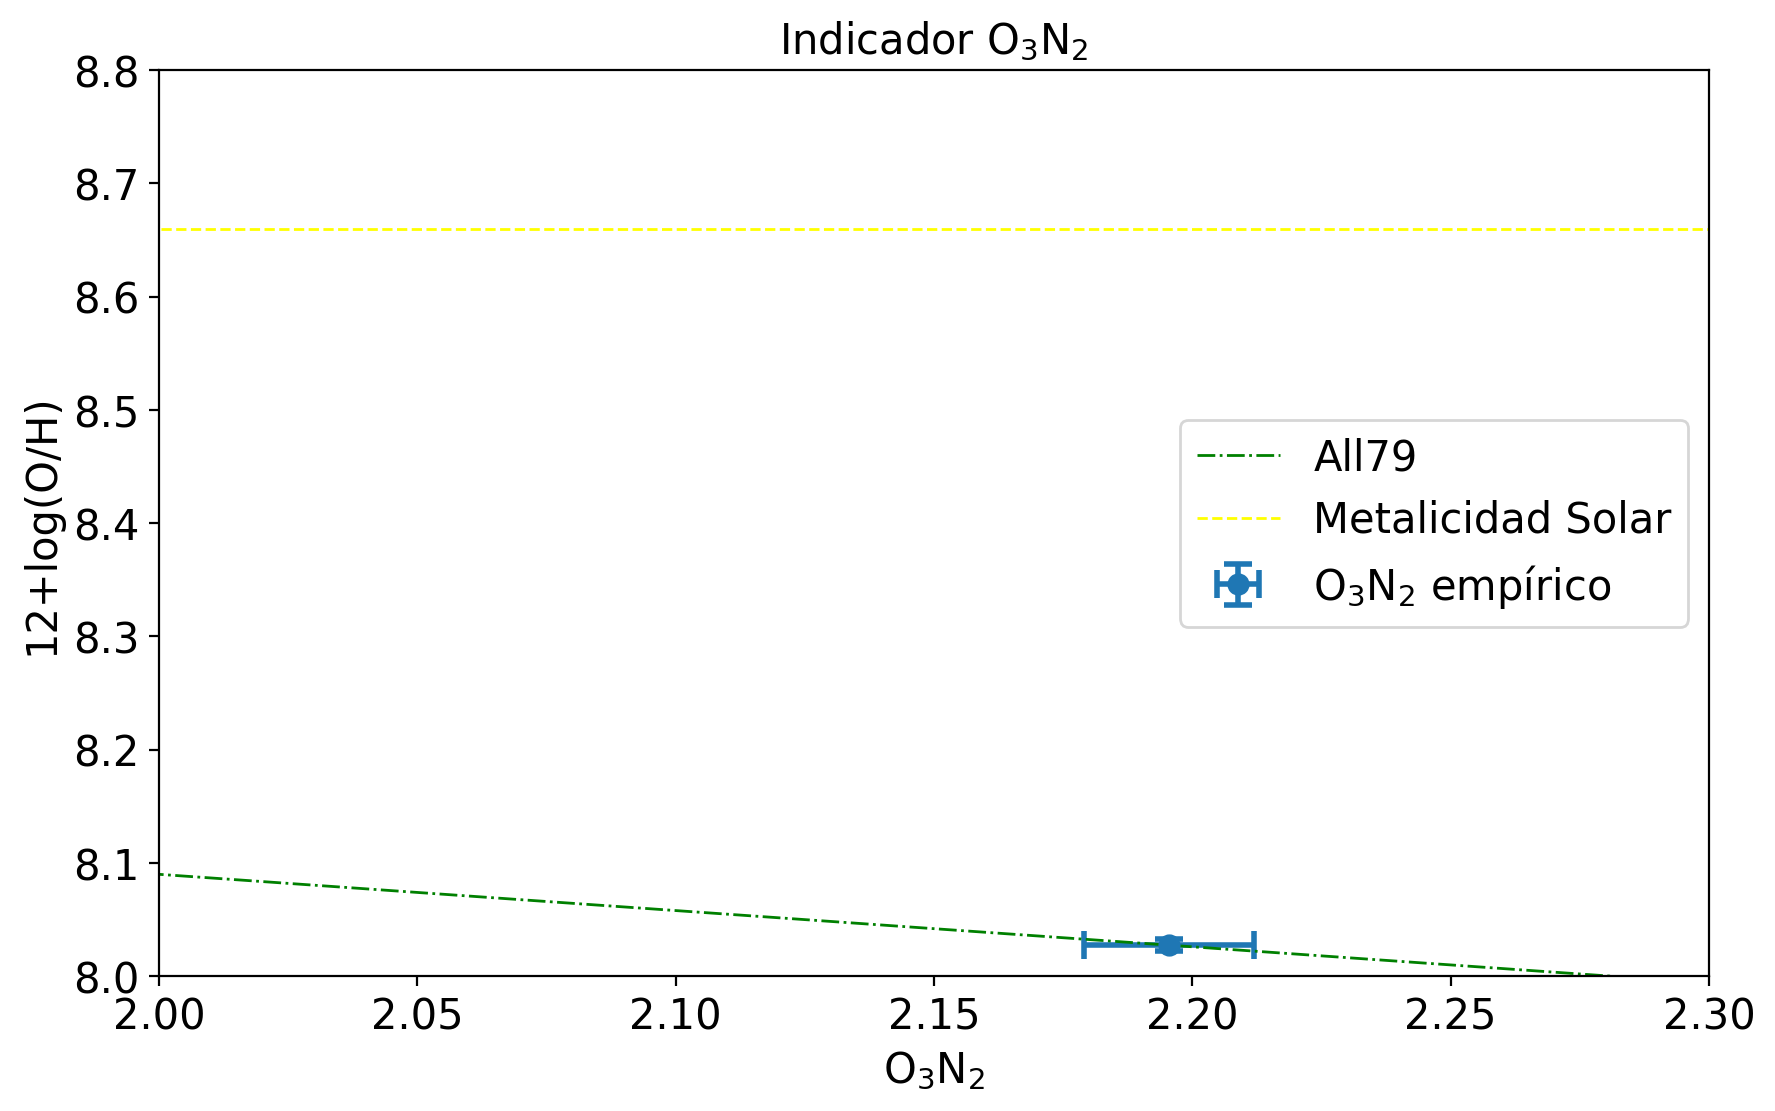

In [28]:
#PLOT PARA EL ESTIMADOR N_2
fig = plt.figure(figsize=(10, 6), dpi=200) # Create a figure of size 8x6 inches, 80 dots per inch
ax = fig.add_subplot(1,1,1)

ax.errorbar(o_tres_n_dos , param_o_tres_n_dos ,
            xerr=e_o_tres_n_dos ,
            yerr = e_param_o_tres_n_dos,
            fmt = "o",
            capsize = 5, 
            elinewidth=2,
            markeredgewidth=2, 
            label='O$_3$N$_2$ empírico')

x = np.arange(-4,5,0.1)
param = 8.73 - 0.32 *x
ax.plot(x, param, color = "green", linewidth=1, linestyle="-.",label="All79")

x_sol = np.arange(1,4,1)
y_sol = [8.66,8.66,8.66]
ax.plot(x_sol, y_sol, color = "yellow", linewidth=1, linestyle="--",label="Metalicidad Solar")


ax.set_xlim(2,2.3)
ax.set_ylim(8,8.8)
ax.tick_params(labelsize=15)

ax.set_title('Indicador O$_3$N$_2$',fontsize = 15)
ax.set_xlabel('O$_3$N$_2$',fontsize = 15)
ax.set_ylabel('12+log(O/H)',fontsize = 15)

ax.legend(loc='center right',fontsize = 15)
plt.savefig("o_tres_n_dos.eps")
plt.show()

In [49]:
metalicidad = [down,param_N_dos,param_o_tres_n_dos]
print("Metalicidad = {} +/- {}".format(np.mean(metalicidad),np.std(metalicidad)))

Metalicidad = 8.070287279595172 +/- 0.042488762894363326


In [48]:
z = df_correct["z"].mean()
e_z = df_correct["z"].std()
c = 3*10**5 #km/s
H_cero = 67.36 #km/s/Mpc
e_H_cero = 0.54
Q_estrella_O = 10**49
Mpc_a_cm = 3.086*10**24
dist = (z*c/H_cero)*Mpc_a_cm #cm
e_dist = np.sqrt((e_z*Mpc_a_cm*c/H_cero)**2 + ((e_H_cero*z*c/H_cero**2)*Mpc_a_cm)**2)
print("Distancia = {}$\pm${}(Mpc)".format(dist/Mpc_a_cm ,e_dist/Mpc_a_cm ))

L = df_correct["flux_nonorma"][10]*4*np.pi*dist**2*10**(-17)
e_L = np.sqrt((df_correct["e_flux_nonorma"][10]*4*np.pi*dist**2*10**(-17))**2 + (df_correct["flux_nonorma"][10]*4*np.pi*e_dist**2*10**(-17))**2)
print("Luminusidad = {}$\pm${}(Wcm^-2)".format(L,e_L))

Q = 7.31*10**(11)*L
e_Q = 7.31*10**(11)*e_L

num_estrellas = Q/Q_estrella_O 
e_num_estrellas = e_Q/Q_estrella_O 
print("Num. estrellas = {}$\pm${}".format(num_estrellas,e_num_estrellas))

Distancia = 7.945775671229843$\pm$0.32389768877155833(Mpc)
Luminusidad = 5.304096526767367e+37$\pm$1.06146245787314e+36(Wcm^-2)
Num. estrellas = 3.8772945610669454$\pm$0.07759290567052653


5.304096526767367e+37

In [31]:
df_correct.to_csv('pandas.csv', header=True, index=None, sep=',', mode='a')